# Executive Summary



1) Purpose
    - below I analyze Sample_4_Stars_blue_314248_lines.txt 
    - for 17-18 mag stars the median error is 0.0602  
    - the sample was made using  SDSS_g_mag < 20 , CRTS_avg_err < 0.3
    - it was thought that the selection used SDSS_r_mag, which is incorrect - in fact it used SDSS_g_mag, which is why it has different properties than a sample made using SDSS_r_mag 

2) Method: 
    - I make sure that each star has exactly the same magnitude reported for each xi, ei row
    - I compare the magnitudes for each star  to the catalog SDSS_r_mag and SDSS_g_mag
    - I show how the SDSS distributions for g and r magnitudes differ, and how they affect the magnitude selection
    
3) Results:
    - The magnitudes in Sample_4_Stars_blue_314248_lines.txt  are identical to SDSS_g_mag
    - Selecting 17-18 magnitudes with r or g magnitudes  leaves 5804 or 4163 stars from the catalog 
    - The overlap between such samples includes only 1432 stars 
    - Using SDSS_g_mag instead of SDSS_r_mag for selection of stars  is responsible for the  median(ei) bias on the 0.01 level


# Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('Sample_4_Stars_blue_314248_lines.txt')

xi = data[:,0]
ei = data[:,1]
n = data[:,2]
maybe_rmag = data[:,3]

In [3]:
np.savetxt('Sample_4_Stars_blue_314248_lines.txt'np.unique(n)

array([  2.51000000e+02,   3.36600000e+03,   3.98900000e+03, ...,
         1.00528900e+06,   1.00621400e+06,   1.00672300e+06])

In [112]:
# Reproduce the median error 

np.median(ei[(maybe_rmag<18)*(maybe_rmag>17)])

0.060207972893999998

In [4]:
# Suppose it is the r-mag, although I think it is the g-mag : 
# See whether the plot of maybe_r-mag from this file is the same as the plot 
# of the r-mag for stars in this file from the catalog 

def get_stars_catalog():
    File = 'CRTS_SDSS_cross_matched_stars_catalog.txt'
    colnames = open(File,'r').read().splitlines()[0][1:].split()
    datatable = np.genfromtxt(File)
    stars_catalog = {}
    print 'zipping CRTS-SDSS stars catalog...'
    for label, column in zip(colnames, datatable.T):
        stars_catalog[label] = column
        
    return  colnames, stars_catalog

cols2 , star_cat= get_stars_catalog()

zipping CRTS-SDSS stars catalog...


In [13]:
cols2

['CRTS_M',
 'CRTS_Merr',
 'dec_SDSS',
 'ra_SDSS',
 'dec_CRTS',
 'ra_CRTS',
 'g_Nobs',
 'g_mMed',
 'r_mMed',
 'i_mMed',
 'crts_id',
 'mjd_span',
 'mjd_N',
 'N_rows']

In [16]:
# Grab how many individual stars we have, and how many xi, ei points per star  
stars = np.unique(n)
a = [ np.sum(n == star)  for star in stars ]

In [26]:
# Make sure that all the reported magnitudes per star are the same 
b = [ (maybe_rmag[n == star] == maybe_rmag[n == star][0]).all() for star in stars]
print np.where(b == False)

(array([], dtype=int64),)


In [27]:
# So I can just grab one of the magnitude measurements per star
stars_mag = [maybe_rmag[n == star][0] for star in stars]


(array([ 227.,  136.,   65.,  264.,  478.,  549.,  175.,   19.,   32.,   18.]),
 array([   1. ,   38.6,   76.2,  113.8,  151.4,  189. ,  226.6,  264.2,
         301.8,  339.4,  377. ]),
 <a list of 10 Patch objects>)

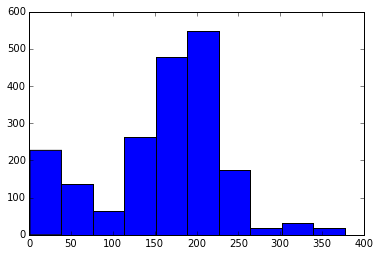

In [19]:
# How many measurements do we have per star ? 
%matplotlib inline
plt.hist(a)

In [33]:
m1 = np.in1d(star_cat['crts_id'], stars)

In [53]:
cat_rmags = [star_cat['r_mMed'][star_cat['crts_id'] == star][0]  for star in stars ]

In [54]:
cat_gmags = [star_cat['g_mMed'][star_cat['crts_id'] == star][0]  for star in stars ]

In [62]:
# The g-magnitudes are identical ! 
# That's where the devil lies - the values reported in sample 4 were SDSS g magnitudes, not SDSS r magnitudes! 
np.where((np.array(cat_gmags) - np.array(stars_mag)) != 0 )


(array([], dtype=int64),)

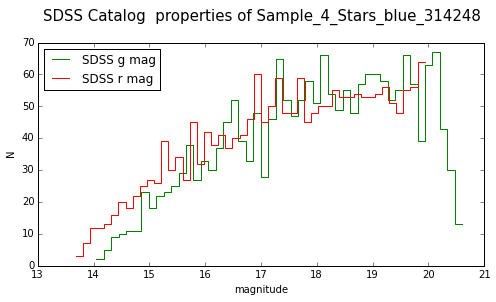

In [78]:
# The distributions of r mags and g mags for these same stars are very different 
from matplotlib import gridspec
fig = plt.figure(figsize=(8,4))
gs = gridspec.GridSpec(1, 1) 
ax = plt.subplot(gs[0])


ax.set_ylabel('N')
ax.set_xlabel('magnitude')
nbins = 50
hist1, bin_edges = np.histogram(cat_gmags, bins = nbins, density=False)
bin_cen1 = (bin_edges[:-1] + bin_edges[1:])/2

# exclude those 17 objects that don't have SDSS r mag 
#hist2, bin_edges = np.histogram(qso_catalog['r'][qso_catalog['r'] != 0], bins=nbins, density=True)

hist2, bin_edges = np.histogram(cat_rmags, bins=nbins, density=False)
bin_cen2 = (bin_edges[:-1] + bin_edges[1:])/2

ax.plot(bin_cen1, hist1, color = 'green', ls='steps', label='SDSS g mag')
ax.plot(bin_cen2, hist2, color = 'red', ls='steps', label='SDSS r mag')
ax.legend(loc='upper left')
ax.set_title('SDSS Catalog  properties of Sample_4_Stars_blue_314248 \n', fontsize=15)


In [88]:
# Reproduce the cuts : Select 17-18 according to r-mag and calculate median ei 

cat_gmags = np.array(cat_gmags)
m=(cat_gmags < 18 )*(cat_gmags>17)
print('%d stars from the g-mag cut using the catalog'%np.sum(m))


367 stars from the g-mag cut using the catalog


In [91]:
# I reproduce the median error from Zeljko's email
np.median(ei[np.in1d(n,stars[m])])

0.060207972893999998

In [92]:
# Now if I cut according to r-mags from the catalog...
cat_rmags = np.array(cat_rmags)
m1=(cat_rmags < 18 )*(cat_rmags>17)
print('%d stars from the g-mag cut using the catalog'%np.sum(m1))



393 stars from the g-mag cut using the catalog


In [93]:
# And I get a significantly different mean 
np.median(ei[np.in1d(n,stars[m1])])

0.068089720222700004

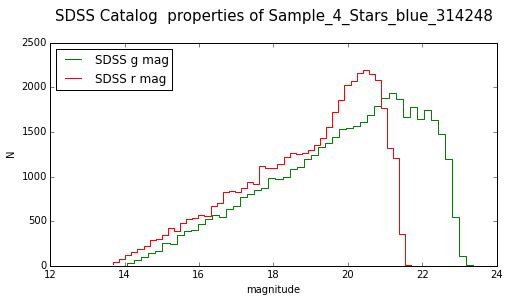

In [95]:
# Show how catalog g and r magnitude cuts give very different stars 
from matplotlib import gridspec
fig = plt.figure(figsize=(8,4))
gs = gridspec.GridSpec(1, 1) 
ax = plt.subplot(gs[0])


ax.set_ylabel('N')
ax.set_xlabel('magnitude')
nbins = 50
hist1, bin_edges = np.histogram(star_cat['g_mMed'], bins = nbins, density=False)
bin_cen1 = (bin_edges[:-1] + bin_edges[1:])/2

# exclude those 17 objects that don't have SDSS r mag 
#hist2, bin_edges = np.histogram(qso_catalog['r'][qso_catalog['r'] != 0], bins=nbins, density=True)

hist2, bin_edges = np.histogram(star_cat['r_mMed'], bins=nbins, density=False)
bin_cen2 = (bin_edges[:-1] + bin_edges[1:])/2

ax.plot(bin_cen1, hist1, color = 'green', ls='steps', label='SDSS g mag')
ax.plot(bin_cen2, hist2, color = 'red', ls='steps', label='SDSS r mag')
ax.legend(loc='upper left')
ax.set_title('SDSS Catalog  properties of Sample_4_Stars_blue_314248 \n', fontsize=15)


In [97]:
# Number of stars in 0-20 mag cut 
m = star_cat['r_mMed'] < 20
len(star_cat['r_mMed'][m])

30541

In [99]:
# Number of stars in 0-20 mag cut
m = star_cat['g_mMed'] < 20
len(star_cat['g_mMed'][m])

21708

In [115]:
# Number of stars in 17-18 mag cut , r mag 
mr = (star_cat['r_mMed'] < 18 )*(star_cat['r_mMed'] > 17)
len(star_cat['r_mMed'][mr])

5804

In [116]:
# Number of stars in 17-18 mag cut , g mag 
mg = (star_cat['g_mMed'] < 18 )*(star_cat['g_mMed'] > 17)
len(star_cat['g_mMed'][mg])

4163

In [108]:
# What is the overlap ?

np.sum(np.in1d(star_cat['crts_id'][mr],star_cat['crts_id'][mg]))

1432

In [109]:
np.sum(np.in1d(star_cat['crts_id'][mg],star_cat['crts_id'][mr]))

1432

Conclusion: 
    Only 1432 stars!  This means that performing the selection with SDSS g mag vs  SDSS r mag brings very different stars!  

# Sample_6_Stars_blue_314248.txt : same stars (selected by g-mag) but reporting r_mag 

In [118]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('Sample_6_Stars_blue_314248_lines.txt')

xi = data[:,0]
ei = data[:,1]
n = data[:,2]
rmag = data[:,3]

In [122]:
# Now the stars are the same as in sample 4, but the reported magnitudes are SDSS_r

# That's why the median error for 17-18 rmag cut is the same as for stars selected according to catalog rmag 
# in Sample 4 
np.median(ei[np.in1d(n,stars[m1])]) == np.median(ei[(rmag<18)*(rmag>17)])

True